Steam is the world's most popular digital storefront for pc gaming. In this dataset, data is compiled on various Steam users recording the game they played and how long they play it. Lets explore the most popular titles. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/steam-200k.csv', header=None, index_col=None, usecols=[0,1,2,3], names=['UserID', 'GameTitle', 'Action', 'Hours'])
df.head(20)

,UserID,GameTitle,Action,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
5,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,purchase,1.0
7,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,purchase,1.0
9,151603712,Left 4 Dead 2,play,8.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UserID     200000 non-null  int64  
 1   GameTitle  200000 non-null  object 
 2   Action     200000 non-null  object 
 3   Hours      200000 non-null  float64
 4   Other      200000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


**Data Exploration**

The 'purchase' rows seem pretty unnecessary. Lets drop those for now. 

In [ ]:
df=df.loc[df['Action']=='play']
df=df.drop(columns=['Action'])
df.head()

,UserID,GameTitle,Hours,Other
1,151603712,The Elder Scrolls V Skyrim,273.0,0
3,151603712,Fallout 4,87.0,0
5,151603712,Spore,14.9,0
7,151603712,Fallout New Vegas,12.1,0
9,151603712,Left 4 Dead 2,8.9,0


In [ ]:
print('There are', len(pd.unique(df['UserID'])), 'steam users in this dataset.')
print("Number of Games : ", len(pd.unique(df['GameTitle'])))

There are 11350 steam users in this dataset.
Number of Games :  3600


**Data Visualization**

Lets start by visualizing the top 10 most played games on Steam

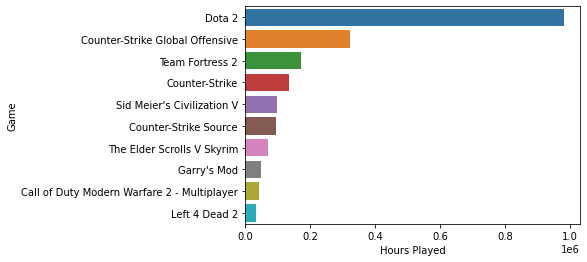

In [ ]:
top = 10
hours_played = df.groupby('GameTitle')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'Game': hours_played.index, 'Hours Played': hours_played.values})[0:top]

sns.barplot(y = 'Game', x = 'Hours Played', data = hours_played);

This plot shows the games with the most *cumulative* hours played on Steam. Now let's sort the top 10 games played by the most active users on steam. 

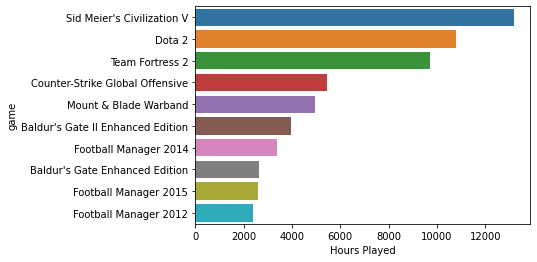

In [ ]:
user_counts = df.groupby('UserID')['Hours'].agg(np.sum).sort_values(ascending=False)[0:top]
new = df['UserID'].isin(user_counts.index)
df_user_info = df.loc[new]
user_hours_played = df_user_info.groupby('GameTitle')['Hours'].agg(np.sum).sort_values(ascending=False)
user_hours_played = pd.DataFrame({'game': user_hours_played.index, 'Hours Played': user_hours_played.values})[0:top]

sns.barplot(y='game', x='Hours Played', data = user_hours_played);

In [ ]:
array = df_user_info['UserID'].unique()
count = np.count_nonzero(array)
print('There are', count, 'users in the graph above.')

There are 10 users in the graph above.


Let's put the two graphs side-by-side to better compare the two groups. 

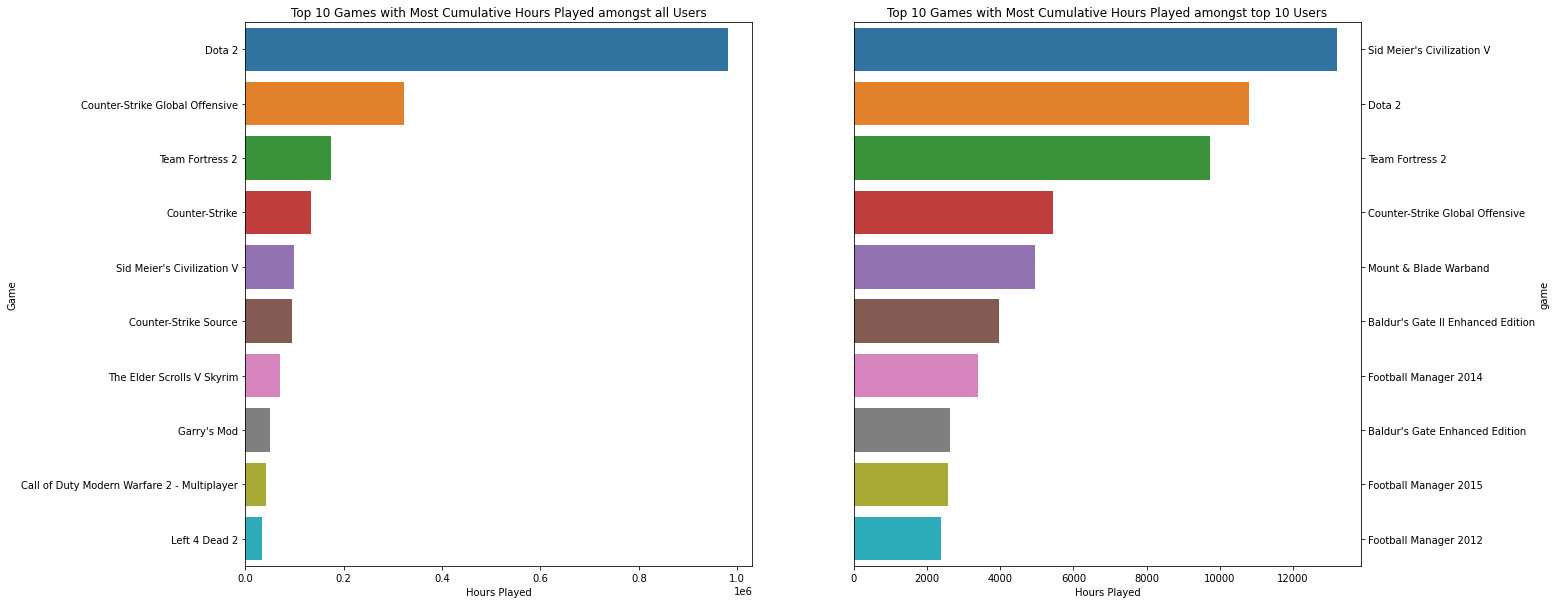

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, top))
sns.barplot(y = 'Game', x = 'Hours Played', data = hours_played, ax=ax[0])
sns.barplot(y='game', x='Hours Played', data = user_hours_played, ax=ax[1])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[0].set_title('Top 10 Games with Most Cumulative Hours Played amongst all Users')
ax[1].set_title('Top 10 Games with Most Cumulative Hours Played amongst top 10 Users');

Interestingly, there are noticable differences between the games that appear in the two figures. For instance, *The Elder Scrolls V: Skyrim* (a game in which I've personally invested plenty of time) is ranked as the 7th most played game on Steam amongst all users, but does not appear in the top 10 games played by the most active players on Steam. We can infer from this that *Skyrim* is a title that appeals to wide audience, but is not as popular amongst the most hardcore of gamers. 

Additionally, *Sid Meier's Civilization V* is the most popular game amongst the top 10 most active users, but is less popular among users as a whole, placing 5th in cumulative ranking well behind *Dota 2* and *CS:GO*. We can infer from this that *Civilization V*, while still popular, has more appeal with hardcore gamers, and has a devoted fanbase, rather than broad appeal. The same can be said for *Football Manager 2015* and *Football Manager 2012*, which do not even appear in the rankings for all users, but appear 9th and 10th respectively among the top 10 players. 

Lets switch our focus to another phenomenon on Steam. Due to the convenience of the Steam storefront, along with the frequency of sales and the abundance of inexpensive indie titles, it is very common for users to purchase a game on Steam, but never actually get around to playing it. Let's bring back the 'purchased' column to compare how many games are purchased, but ignored by players. 

In [ ]:
x = df.groupby(['UserID', 'GameTitle'])['Action'].size()
s = x[x==1]
print('There were', len(x), 'games purchased on Steam in this sample.')
print('Of those,', len(s), 'games were never actually played.')

There were 128804 games purchased on Steam in this sample.
Of those, 57904 games were never actually played.


In [ ]:
boolean_index = df.groupby(['UserID','GameTitle'])['Action'].transform('size') < 2
df.loc[boolean_index, 'Hours'] = 0
df.loc[df['Hours']==0]

df.loc[df.Hours==0, 'Action'] = 'play'

ignored_df = df.loc[df['Hours']==0]
ignored_df.head()

,UserID,GameTitle,Action,Hours
52,151603712,Alan Wake,play,0.0
53,151603712,BioShock 2,play,0.0
54,151603712,Fallen Earth,play,0.0
55,151603712,Fallout New Vegas Courier's Stash,play,0.0
56,151603712,Fallout New Vegas Dead Money,play,0.0


This dataset contains the games that users purchased, but never played. Let's explore and see which games get ignored the most, as well as which users are apt to purchase a game they will never play.

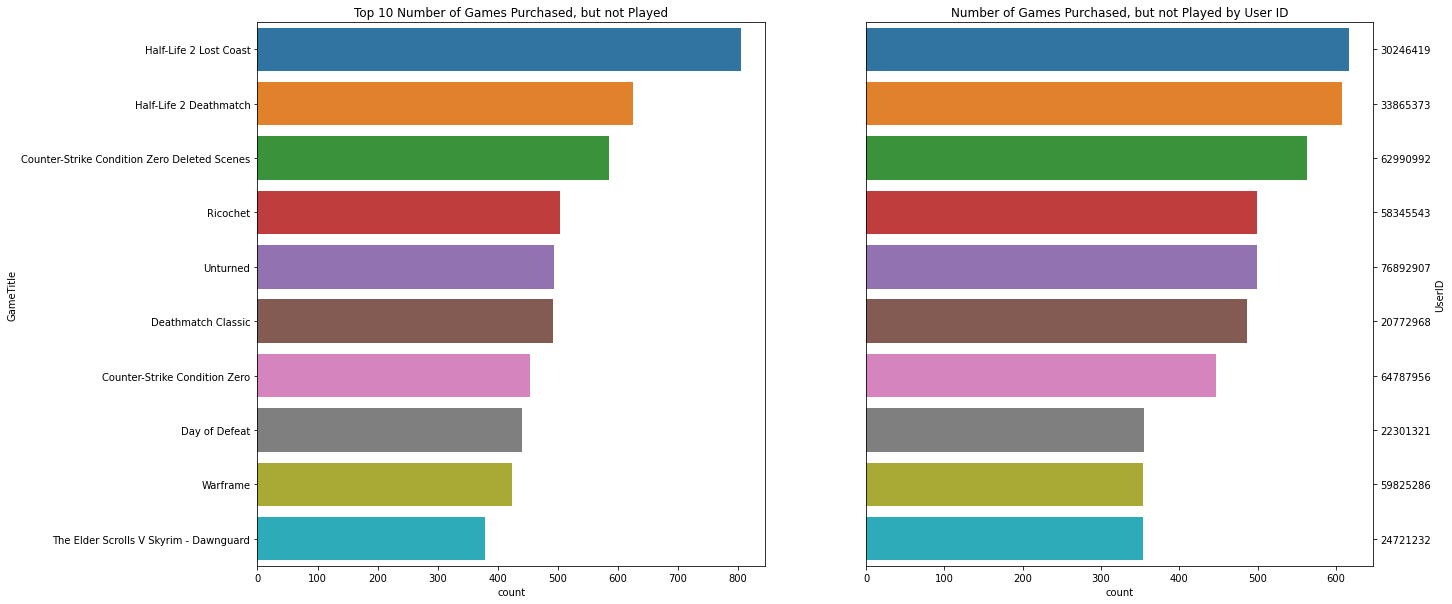

In [ ]:
top = 10
fig, ax = plt.subplots(1,2,figsize=(20,top))
sns.countplot(y='GameTitle', data=ignored_df, order=ignored_df.GameTitle.value_counts().iloc[:top].index, ax=ax[0])
sns.countplot(y='UserID', data=ignored_df, order=ignored_df.UserID.value_counts().iloc[:top].index, ax=ax[1])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_title('Number of Games Purchased, but not Played by User ID')
ax[0].set_title('Top 10 Number of Games Purchased, but not Played');

What stands out to me here is that a lot of the games in the top 10 'purchased but not played' table are DLC packs (downloadable content) for other games in the Steam library. Time spent playing DLC is not recorded by Steam, it is just added to the time spent playing the base game. If we exclude the DLC packs, which we cant reliably say were never played, then *Ricochet* is the top most ignored game on Steam, with over 500 users purchasing, but never playing it. 